# Learn You an R

# Intro

## What is R?

<h3 style="text-align:center;">"Data Science"</h3>

<h3 style="text-align:center;">"Statistics"</h3>

## What is R?

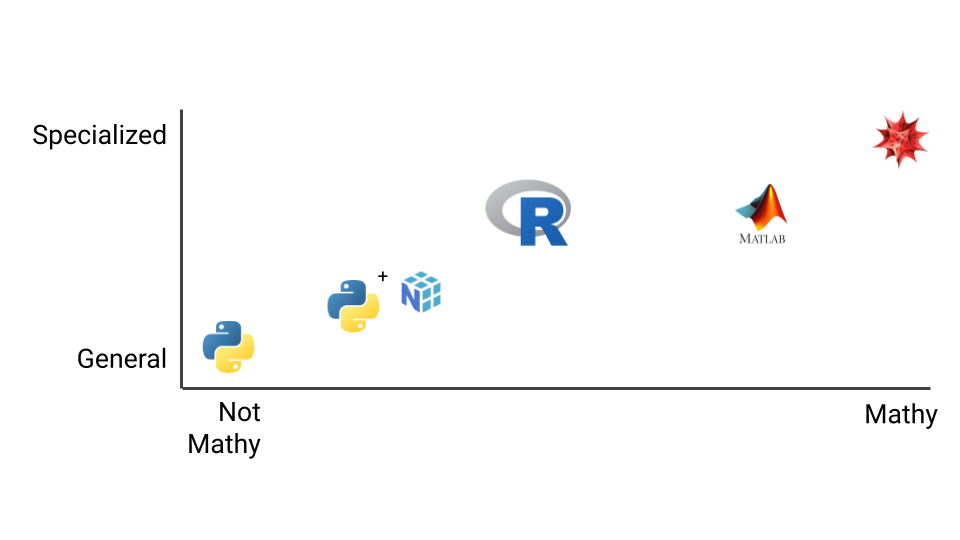

## What is R?

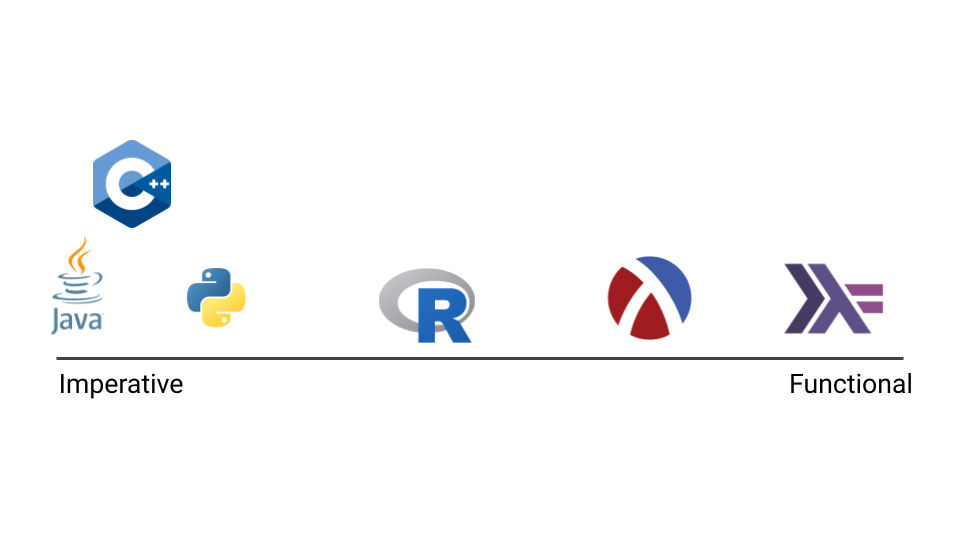

## What is R?

* Implementation of / Successor to "S"
    * Created ~ the same time as C
* ~30yr Old
* Actively Used by Thousands
    * R powers tons of data-science stuff in many companies



## On to the Code!

# Basics

R syntax is mostly pretty normal.

**Booleans**

In [2]:
TRUE
FALSE

[1] TRUE

[1] FALSE

**Numbers**

In [3]:
-1
1
1.2

[1] -1

[1] 1

[1] 1.2

**Strings**

In [4]:
"I am a string"
'single quotes work too'

[1] "I am a string"

[1] "single quotes work too"

**Math**

In [5]:
1 + 2
2^8
5 %% 3

[1] 3

[1] 256

[1] 2

**Variables**

In [6]:
my_variable <- 42
my_variable

[1] 42

**Functions**

In [7]:
print("I'm a function")

[1] "I'm a function"


In [8]:
# Make your own!
say_hello <- function(name) {
    print(paste("Hello", name))
}
say_hello("Hacker Refactor")

[1] "Hello Hacker Refactor"


**Control Flow**

In [9]:
if (8 %% 2 == 0) {
    print("8 is even")
}

[1] "8 is even"


In [10]:
my_variable
while (my_variable > 0) {
    my_variable <- my_variable - 1
}
my_variable

[1] 42

[1] 0

In [11]:
sum <- 0
for (i in 1:10) {
    sum <- sum + i
}
sum

[1] 55

# Vectors

In R, everyting is a vector.

"Vector" is R's name for:

* "lists" in Python
* "arrays" in Java, C, js, C#, etc
* "vectors" in C++

All these things we just talked about were vectors.

In [12]:
length(10)
length("hello")
length(TRUE)

[1] 1

[1] 1

[1] 1

Extend vectors with "combine", spelled `c`

In [13]:
c(1, 2, 3, 4, 5)
c("a", "b", "c")

[1] 1 2 3 4 5

[1] "a" "b" "c"

In [14]:
length(c(1, 2, 3, 4, 5))

[1] 5

Remember this is just concatenating existing vectors

In [15]:
c(1, c(2, 3), 4)

[1] 1 2 3 4

Everything is a vector, so all operators are defined over vectors

In [16]:
c(1, 2, 3) * 5
2 ^ c(1, 2, 3, 4, 5, 6, 7, 8)

[1]  5 10 15

[1]   2   4   8  16  32  64 128 256

Including multi-element vectors

In [17]:
c(1, 2) + c(3, 4)

[1] 4 6

This includes general "broadcasting"

In [18]:
c(1, 2, 3, 4) * c(100, -1)

[1] 100  -2 300  -4

# Vector Indexing

This is where things get really fun.

**Basic Indexing**

In [19]:
example_vector <- c(1, -1, 2, 8, 3, -5, 100)

Indexing uses `[..]` like in most languages

In [20]:
example_vector[1]

[1] 1

But... Remember everything is a vector

In [21]:
example_vector[c(1, 3, 5, 7)]

[1]   1   2   3 100

Negative indexes act like a filter

In [22]:
example_vector[-7]

[1]  1 -1  2  8  3 -5

**Bool Indexing**

In [23]:
example_vector <- c(1, -1, 2, 8, 3, -5, 100)

Include/exclude each element

In [24]:
example_vector[c(TRUE, FALSE, TRUE, FALSE, TRUE, FALSE, TRUE)]

[1]   1   2   3 100

Vectors are repeated, useful for "every other" type filters

In [25]:
example_vector[c(TRUE, FALSE)]

[1]   1   2   3 100

**Bool Filters**

This is the walkthrough

In [26]:
example_vector <- c(1, -1, 2, 8, 3, -5, 100)

All Negatives

In [27]:
example_vector < 0

[1] FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE

In [28]:
example_vector[c(FALSE, TRUE, FALSE, FALSE, FALSE, TRUE, FALSE)]

[1] -1 -5

In [29]:
example_vector[example_vector < 0]

[1] -1 -5

**Bool Filters**

In [30]:
example_vector <- c(1, -1, 2, 8, 3, -5, 100)

Outliers (> 90th Percentile)

In [31]:
example_vector[example_vector > quantile(example_vector, .9)]

[1] 100

Non-Outliers (inverse)

In [32]:
example_vector[!(example_vector > quantile(example_vector, .9))]

[1]  1 -1  2  8  3 -5

# Lists

The last basic thing we need to know.

Lists are kind-of like dictionaries/Hashes/Associative Arrays

In [33]:
favorite_colors <- list(
    josh = "purple",
    sam = "yellow",
    brenna = "black"
)
favorite_colors

$josh
[1] "purple"

$sam
[1] "yellow"

$brenna
[1] "black"

You can index them like a vector by key

In [34]:
favorite_colors[c("josh", "brenna")]

$josh
[1] "purple"

$brenna
[1] "black"

`[[` works more like a standard dictionary lookup

In [35]:
favorite_colors[["josh"]]

[1] "purple"

`$` is a shorthand for `[[` if you know the key name

In [36]:
favorite_colors$josh

[1] "purple"

Lists can also work like arrays

In [37]:
list(1, 2, 3)

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 3

They can contain different types though!

In [38]:
list(1, 'a', TRUE)

[[1]]
[1] 1

[[2]]
[1] "a"

[[3]]
[1] TRUE

# Data Frames

The heart and soul of data-analysis in R.

Data frames are a rectangular (think excel) structures for data.

In [39]:
pokemon <- read.csv("pokemon.csv")
head(pokemon)

,id,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,⋯,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,⋯,1,2.0,2.0,1.0,1.00,1,1.0,1,1.0,0.5
2,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,⋯,1,2.0,2.0,1.0,1.00,1,1.0,1,1.0,0.5
3,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,⋯,1,2.0,2.0,1.0,1.00,1,1.0,1,1.0,0.5
4,64,50,Alolan Diglett,Digda,ディグダ (Digda),1,Normal,Mole Pokémon,2,Ground,⋯,2,0.5,0.5,0.5,0.25,1,0.5,1,0.5,0.5
5,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,⋯,1,2.0,2.0,1.0,1.00,1,1.0,1,1.0,0.5
6,65,51,Dugtrio,Digdri,ダグトリオ (Dugtrio),1,Normal,Mole Pokémon,1,Ground,⋯,1,1.0,1.0,1.0,0.50,1,1.0,1,1.0,1.0


They work a lot like lists, where columns are keys

In [40]:
head(pokemon$name)
length(pokemon$name)

[1] "Bulbasaur"      "Ivysaur"        "Venusaur"       "Alolan Diglett"
[5] "Mega Venusaur"  "Dugtrio"

[1] 1028

And we can index them like a vector!

In [41]:
pokemon$name[grep("Char", pokemon$name)]

[1] "Charmander"       "Charmeleon"       "Charizard"        "Mega Charizard X"
[5] "Mega Charizard Y" "Charjabug"

When paired with indexing, slicing data is easy!

In [42]:
pokemon[grep("Char", pokemon$name),]

,id,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,⋯,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,⋯,2,1,1,0.50,2,1,1,1,0.5,0.5
46,5,5,Charmeleon,Glutexo,リザード (Lizardo),1,Normal,Flame Pokémon,1,Fire,⋯,2,1,1,0.50,2,1,1,1,0.5,0.5
50,6,6,Charizard,Glurak,リザードン (Lizardon),1,Normal,Flame Pokémon,2,Fire,⋯,0,1,1,0.25,4,1,1,1,0.5,0.5
54,7,6,Mega Charizard X,Glurak,リザードン (Lizardon),1,Normal,Flame Pokémon,2,Fire,⋯,2,1,1,0.50,2,1,2,1,0.5,1.0
88,8,6,Mega Charizard Y,Glurak,リザードン (Lizardon),1,Normal,Flame Pokémon,2,Fire,⋯,0,1,1,0.25,4,1,1,1,0.5,0.5
727,856,737,Charjabug,Akkup,デンヂムシ (Dendimushi),7,Normal,Battery Pokémon,2,Bug,⋯,1,1,1,1.00,2,1,1,1,0.5,1.0


For example, we can grab fire type pokemon

In [43]:
head(pokemon[pokemon$type_1 == "Fire" | pokemon$type_2 == "Fire",])

,id,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,⋯,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,⋯,2,1,1,0.5,2,1,1,1,0.5,0.5
22,384,324,Torkoal,Qurtel,コータス (Cotoise),3,Normal,Coal Pokémon,1,Fire,⋯,2,1,1,0.5,2,1,1,1,0.5,0.5
23,195,155,Cyndaquil,Feurigel,ヒノアラシ (Hinoarashi),2,Normal,Fire Mouse Pokémon,1,Fire,⋯,2,1,1,0.5,2,1,1,1,0.5,0.5
27,196,156,Quilava,Igelavar,マグマラシ (Magmarashi),2,Normal,Volcano Pokémon,1,Fire,⋯,2,1,1,0.5,2,1,1,1,0.5,0.5
33,197,157,Typhlosion,Tornupto,バクフーン (Bakphoon),2,Normal,Volcano Pokémon,1,Fire,⋯,2,1,1,0.5,2,1,1,1,0.5,0.5
36,456,383,Primal Groudon,Groudon,グラードン (Groudon),3,Legendary,Continent Pokémon,2,Ground,⋯,2,1,1,0.5,1,1,1,1,0.5,0.5


# Stats

The thing everyone knows R for.

I'd feel a bit bad going through this entire presentation without talking about stats.

We can do a simple regression on our pokemon dataset

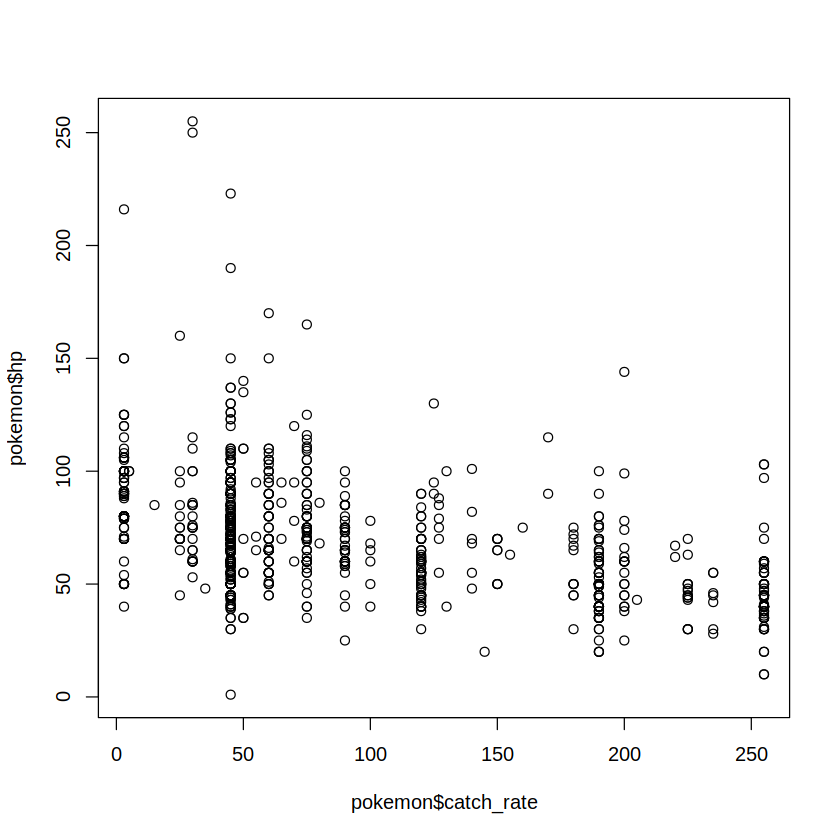

In [44]:
plot(pokemon$catch_rate, pokemon$hp)

Looks like, there's a negative correlation between HP and catch rate, we can fit a linear model to the data with `lm`.

In [45]:
regression <- lm(hp ~ catch_rate, data=pokemon)
regression


Call:
lm(formula = hp ~ catch_rate, data = pokemon)

Coefficients:
(Intercept)   catch_rate  
    84.6154      -0.1623  


And then we can plot our regression against the data.

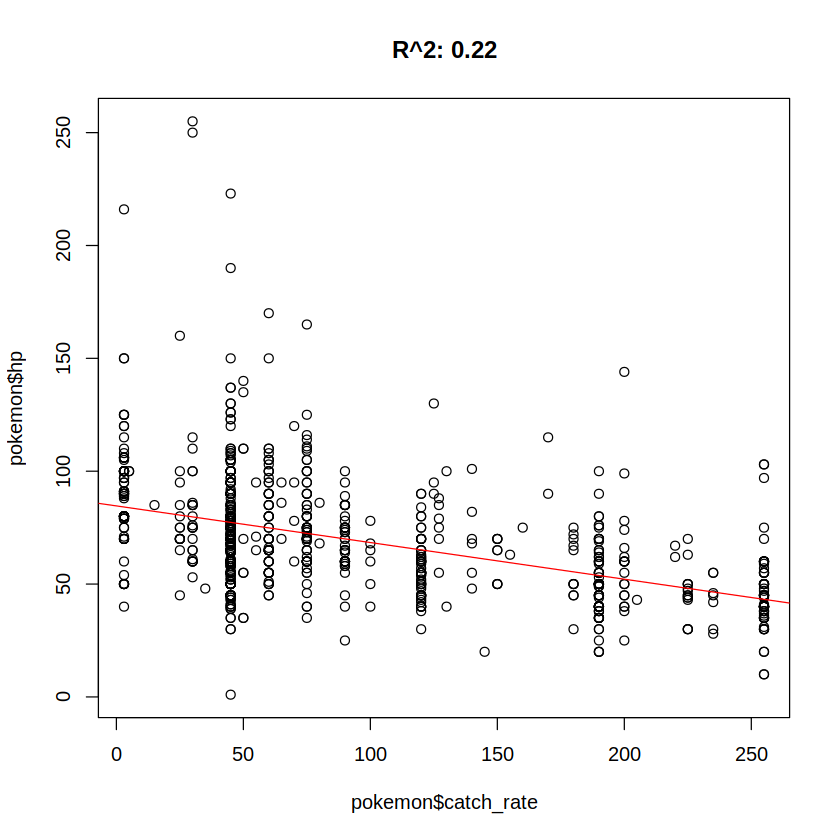

In [46]:
plot(pokemon$catch_rate, pokemon$hp)
abline(regression, col="red")

title(paste("R^2:", format(summary(regression)$r.squared, digits=2)))

I was working with a [gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution)

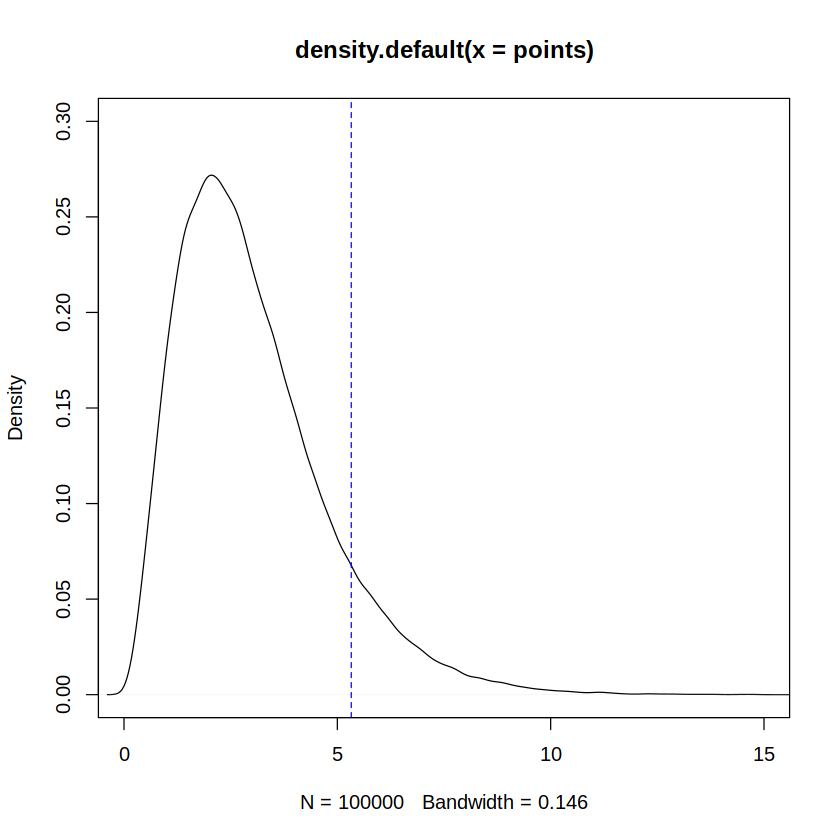

In [47]:
shape <- 3
points <- rgamma(100000, shape)
plot(density(points), xlim=c(0,15), ylim=c(0, 0.3))
abline(v=quantile(points,.9), col="blue", lty="dashed")

## How to efficiently estimate quantile function of Gamma distribution

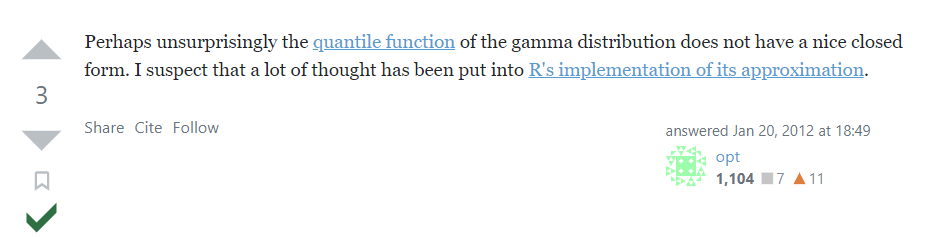

(From https://math.stackexchange.com/q/100791)

So we can use what we've learned to estimate the shape parameter for a given quantile value.

In [52]:
target_90p <- 10
possible_shapes <- seq(.1, 10, length.out=100)
accuracy <- abs(qgamma(.9, possible_shapes) - target_90p)
optimal_shape <- possible_shapes[which.min(accuracy)]
optimal_shape

[1] 6.6

And we can plot that new shape + quantile

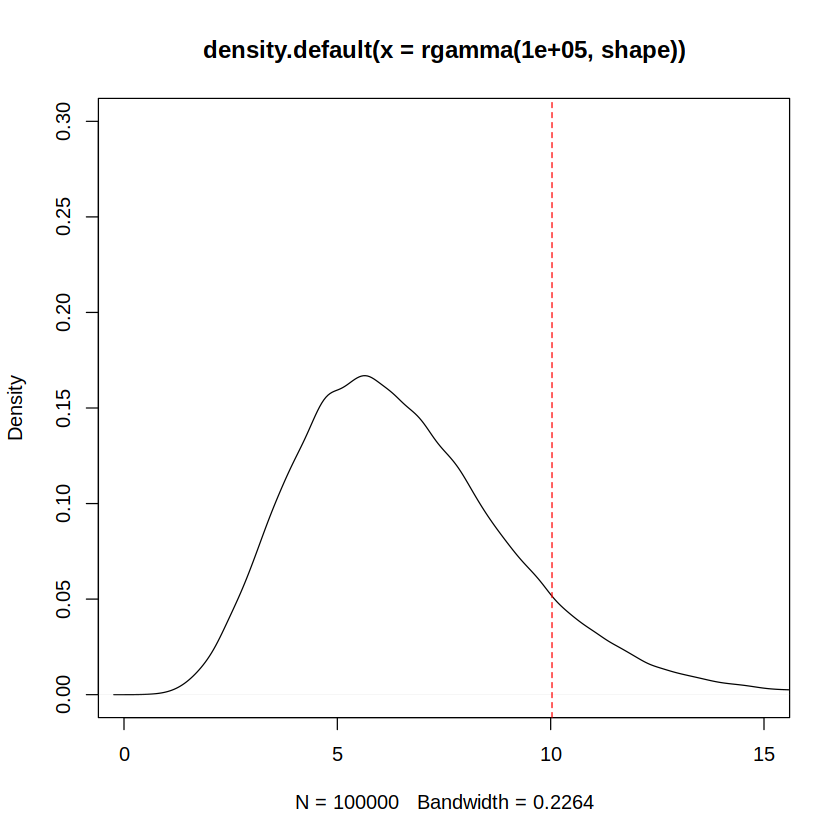

In [53]:
shape <- 6.6
plot(density(rgamma(100000, shape)), xlim=c(0,15), ylim=c(0, 0.3))
abline(v=qgamma(.9, shape), col="red", lty="dashed")

# Just Scratching the Surface

* "Modern" R with pipes, the [tidyverse](https://www.tidyverse.org/), and ggplot2
* Functional Programming with `*apply` and `purrr`.
* Macros
* OOP with R's 3 different class systems
* Web Scraping
* ...and more!

# The End, Questions?

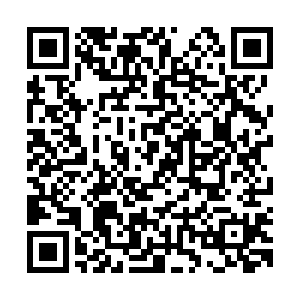

https://github.com/joshkunz/2022-r-hacker-refactor-presentation

Ideas:

* dplyr / tidyverse
* Magic stuff in R
* stats

Configuration

In [1]:
# Need to do this because the SVG graphs were not rendering properly in the HTML slides.
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))